In [1]:
import pandas as pd
import plotly.express as px
import matplotlib.pyplot as plt
import re
from wordcloud import WordCloud

import warnings
warnings.filterwarnings('ignore')

In [2]:
df = pd.read_csv('../../repo/allwomen-da-bootcamp/data/moma.csv', index_col=0)
df.dtypes

Artist ID               int64
Artist Name            object
Nationality            object
Gender                 object
Birth Year            float64
Death Year            float64
Artwork ID              int64
Title                  object
Year                  float64
Medium                 object
Dimensions             object
Diameter (cm)         float64
Circumference (cm)    float64
Height (cm)           float64
Length (cm)           float64
Width (cm)            float64
Depth (cm)            float64
Weight (kg)           float64
Duration (s)          float64
Classification         object
Object Number          object
Catalogue              object
Department             object
Acquisition Year        int64
Credit                 object
dtype: object

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 117242 entries, 0 to 117241
Data columns (total 25 columns):
 #   Column              Non-Null Count   Dtype  
---  ------              --------------   -----  
 0   Artist ID           117242 non-null  int64  
 1   Artist Name         117242 non-null  object 
 2   Nationality         114021 non-null  object 
 3   Gender              111200 non-null  object 
 4   Birth Year          110242 non-null  float64
 5   Death Year          72625 non-null   float64
 6   Artwork ID          117242 non-null  int64  
 7   Title               117218 non-null  object 
 8   Year                114560 non-null  float64
 9   Medium              106200 non-null  object 
 10  Dimensions          107176 non-null  object 
 11  Diameter (cm)       1216 non-null    float64
 12  Circumference (cm)  9 non-null       float64
 13  Height (cm)         101078 non-null  float64
 14  Length (cm)         599 non-null     float64
 15  Width (cm)          100257 non-nul

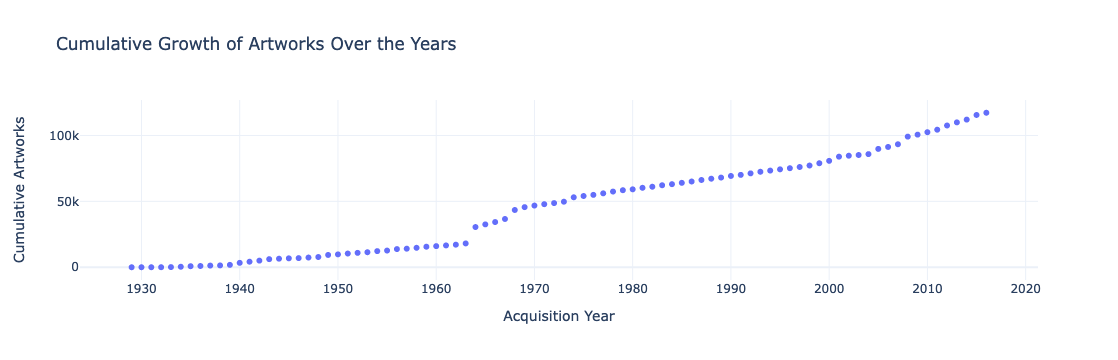

In [4]:
# Visualize cumulative growth of artworks over the years
artworks_count_by_year = df.groupby('Acquisition Year').size().reset_index(name='ArtworkCount')

artworks_count_by_year['Cumulative Artworks'] = artworks_count_by_year['ArtworkCount'].cumsum()


fig = px.scatter(artworks_count_by_year, x='Acquisition Year', y='Cumulative Artworks',
                 title='Cumulative Growth of Artworks Over the Years',
                 template='plotly_white')
fig.show()

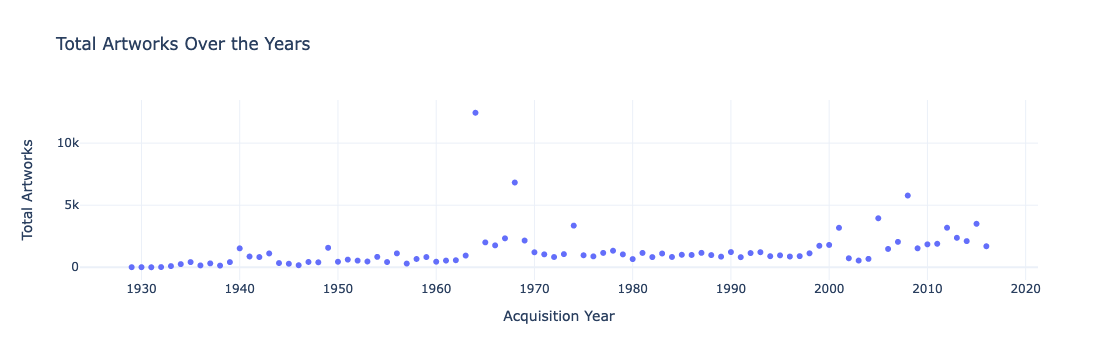

In [5]:
# Visualize artworks count over the years
fig = px.scatter(artworks_count_by_year, x='Acquisition Year', y='ArtworkCount',
                 labels={'ArtworkCount': 'Total Artworks'},
                 title='Total Artworks Over the Years',
                 template='plotly_white')

fig.update_traces(textposition='top left')
fig.show()

In [6]:
# Save data with the 1964 acquisition year and drop all rows with NaN credit values
year1964 = df[df['Acquisition Year'] == 1964]

year1964 = year1964.dropna(subset = ['Credit'])

In [7]:
# Check how many artworks were acquired and where they came from in 1964
year1964['Credit'].value_counts()

The Louis E. Stern Collection                                    10852
Gift of Edward Steichen                                            144
Gift of the photographer                                           122
Transferred from the Museum Library                                122
Purchase                                                            92
                                                                 ...  
Gift of Life Magazine                                                1
Gift of Mrs. Gertrud A. Mellon                                       1
By exchange                                                          1
Gift of Paul J. Sachs                                                1
Gift of the artist in memory of his wife, Sylvia Bender Vagis        1
Name: Credit, Length: 162, dtype: int64

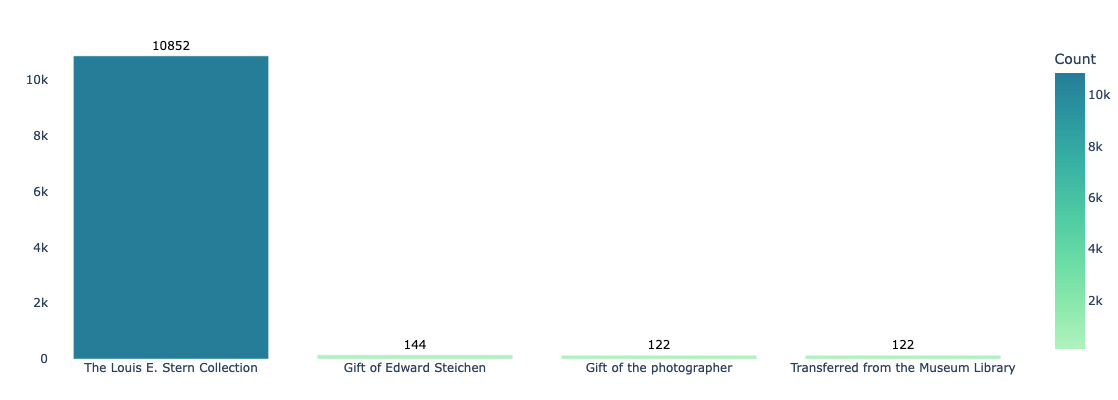

In [8]:
# Visualize how many artworks were acquired per Credit in 1964
year1964_reset = year1964['Credit'].value_counts().reset_index()

year1964_credit_more_than_100 = year1964_reset[year1964_reset['Credit'] > 100]

fig = px.bar(year1964_credit_more_than_100, 
             x='index', 
             y='Credit',
             text='Credit',
             color='Credit',
             color_continuous_scale='Tealgrn',
             title='', 
             labels={'index': 'Credit Type', 'Credit': 'Count'})

fig.update_traces(text=year1964_credit_more_than_100['Credit'], textposition='outside', textfont=dict(color='black'))

fig.update_layout(
    xaxis=dict(title='', showticklabels=True, tickangle=0),
    yaxis=dict(title=''),
    plot_bgcolor='rgba(0, 0, 0, 0)',
    margin=dict(l=0, r=0, t=40, b=0),
    height=400  
)

fig.show()

In [9]:
# Save artworks that were acquired in 1964 from the Louis E. Stern Collection 
artworks1964_by_stern = year1964[year1964['Credit'] == 'The Louis E. Stern Collection']

# Check artists with the most artwork in this selection
artworks1964_by_stern['Artist Name'].value_counts()

Marc Chagall                                       963
Pierre Bonnard                                     818
Pablo Picasso                                      691
Émile Bernard                                      624
André Derain                                       532
                                                  ... 
Sophie Taeuber-Arp                                   1
Theo van Doesburg (Christian Emil Marie Küpper)      1
Giacomo Balla                                        1
Sonia Delaunay-Terk                                  1
Robert Motherwell                                    1
Name: Artist Name, Length: 206, dtype: int64

In [10]:
# Save data with the 1968 acquisition year and drop all rows with NaN credit values
year1968 = df[df['Acquisition Year'] == 1968]

year1968 = year1968.dropna(subset = ['Credit'])

In [11]:
# Check how many artworks were acquired and where they came from in 1968
year1968['Credit'].value_counts()

Abbott-Levy Collection. Partial gift of Shirley C. Burden    4889
Gift of David H. McAlpin                                      262
Gift of the artist                                            205
Purchase                                                      191
John B. Turner Fund                                            88
                                                             ... 
Gift of Mr. and Mrs. W. Dieter Zander                           1
Gift of Mr. and Mrs. Eugene Victor Thaw                         1
Gift of Mr. and Mrs. Alan Kern                                  1
Gift of Mr. and Mrs. G. Alan Chidsey                            1
Acquired from the Artist                                        1
Name: Credit, Length: 196, dtype: int64

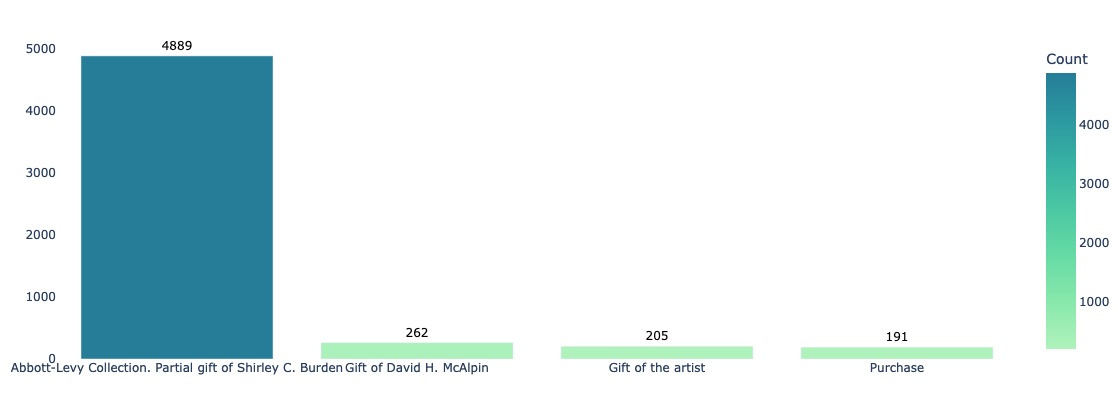

In [12]:
# Visualize how many artworks were acquired per Credit in 1968
year1968_reset = year1968['Credit'].value_counts().reset_index()

year1968_credit_more_tnan_100 = year1968_reset[year1968_reset['Credit'] > 100]

fig = px.bar(year1968_credit_more_tnan_100, x='index', y='Credit', 
             text='Credit',
             title='', 
             color='Credit',
             color_continuous_scale='Tealgrn',
             labels={'index': 'Credit Type', 'Credit': 'Count'})

fig.update_traces(text=year1968_credit_more_tnan_100['Credit'], textposition='outside', textfont=dict(color='black'))

fig.update_layout(
    xaxis=dict(title='', showticklabels=True, tickangle=0),
    yaxis=dict(title=''),
    plot_bgcolor='rgba(0, 0, 0, 0)',  
    
    margin=dict(l=0, r=100, t=40, b=0),  
    height=400,
    width=1200 
)

fig.show()

In [13]:
# Save artworks that were acquired in 1968 from the Abbott-Levy Collection
artworks1968_by_abbott = year1968[year1968['Credit'] == 'Abbott-Levy Collection. Partial gift of Shirley C. Burden']

# Check artists with the most artwork in this selection
artworks1968_by_abbott['Artist Name'].value_counts()

Eugène Atget    4889
Name: Artist Name, dtype: int64

In [14]:
# Save data with the 2008 acquisition year and drop all rows with NaN credit values
year2008 = df[df['Acquisition Year'] == 2008]

year2008 = year2008.dropna(subset = ['Credit'])

In [15]:
# Check how many artworks were acquired and where they came from in 2008
year2008['Credit'].value_counts()

The Gilbert and Lila Silverman Fluxus Collection Gift                                                                                          3421
Gift of the artist                                                                                                                             1193
Fund for the Twenty-First Century                                                                                                                99
General Print Fund                                                                                                                               83
Gift of IFC Films                                                                                                                                52
                                                                                                                                               ... 
Gift of Parkett                                                                                                 

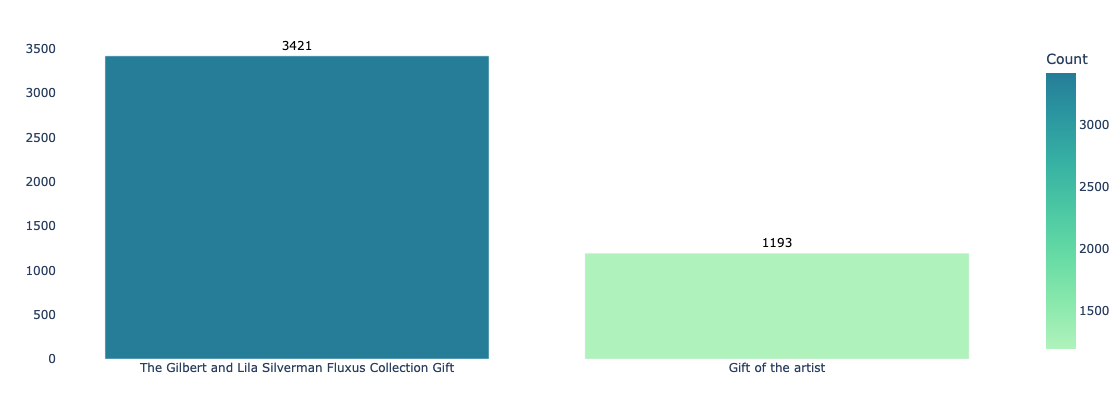

In [16]:
# Visualize how many artworks were acquired per Credit in 2008
year2008_reset = year2008['Credit'].value_counts().reset_index()

year2008_credit_more_than_100 = year2008_reset[year2008_reset['Credit'] > 100]

fig = px.bar(year2008_credit_more_than_100, 
             x='index', 
             y='Credit',
             color='Credit',
             color_continuous_scale='Tealgrn',
             text='Credit',
             title='', 
             labels={'index': 'Credit Type', 'Credit': 'Count'})

fig.update_traces(text=year2008_credit_more_than_100['Credit'], textposition='outside', textfont=dict(color='black'))

fig.update_layout(
    xaxis=dict(title='', showticklabels=True, tickangle=0),
    yaxis=dict(title=''),
    plot_bgcolor='rgba(0, 0, 0, 0)',  
    margin=dict(l=0, r=0, t=40, b=0),  
    height=400
)

fig.show()

In [17]:
# Save artworks that were acquired in 2008 from the Gilbert and Lila Silverman Fluxus Collection
artworks2008_by_silverman = year2008[year2008['Credit'] == 'The Gilbert and Lila Silverman Fluxus Collection Gift']

# Check artists with the most artwork in this selection
artworks2008_by_silverman['Artist Name'].value_counts()

George Maciunas       733
Ben Vautier           237
Robert Watts          198
George Brecht         169
Milan Knížák          165
                     ... 
Elohim (Ely) Raman      1
Larry Baldwin           1
Jirí Kolár              1
Anna Halprin            1
Ely Ramen               1
Name: Artist Name, Length: 141, dtype: int64

In [18]:
# Save artworks that were acquired in 2008 as gifts of the artists
artworks2008_by_artist = year2008[year2008['Credit'] == 'Gift of the artist']

# Check artists with the most artwork in this selection
artworks2008_by_artist['Artist Name'].value_counts()

Louise Bourgeois       1053
William Wegman          110
Robert Rauschenberg      19
Richard Benson            5
Nicholas Nixon            4
Jan De Cock               1
Judit Reigl               1
Name: Artist Name, dtype: int64

In [19]:
# Drop NaN credit values and save to a new df
credit = df.dropna(subset = ['Credit'])

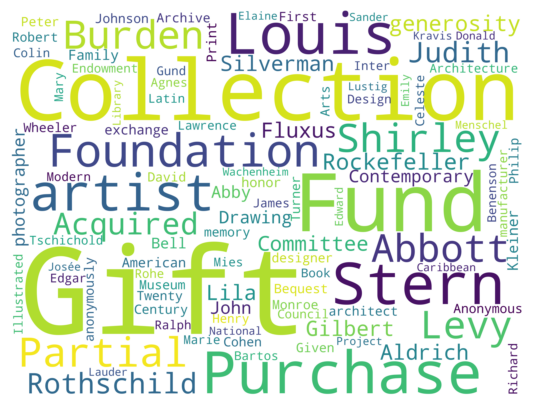

In [20]:
# Create a word cloud from the 'Credit' column
# Wordcloud lib parameters description - http://amueller.github.io/word_cloud/generated/wordcloud.WordCloud.html

credit_text_data = ' '.join(credit['Credit'].astype(str))
wordcloud = WordCloud(width=800, height=600, background_color='white', collocations = False, min_word_length = 4, max_words = 100, scale=4).generate(credit_text_data)

plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off") 
plt.show()

In [21]:
# Check artists with the most artwork 
top_artists = df['Artist Name'].value_counts().head(10)
top_artists

Eugène Atget                5044
Louise Bourgeois            3218
Unknown photographer        1557
Jean Dubuffet               1350
Lee Friedlander             1314
Pablo Picasso               1306
Marc Chagall                1162
Henri Matisse               1050
Ludwig Mies van der Rohe     949
Pierre Bonnard               894
Name: Artist Name, dtype: int64

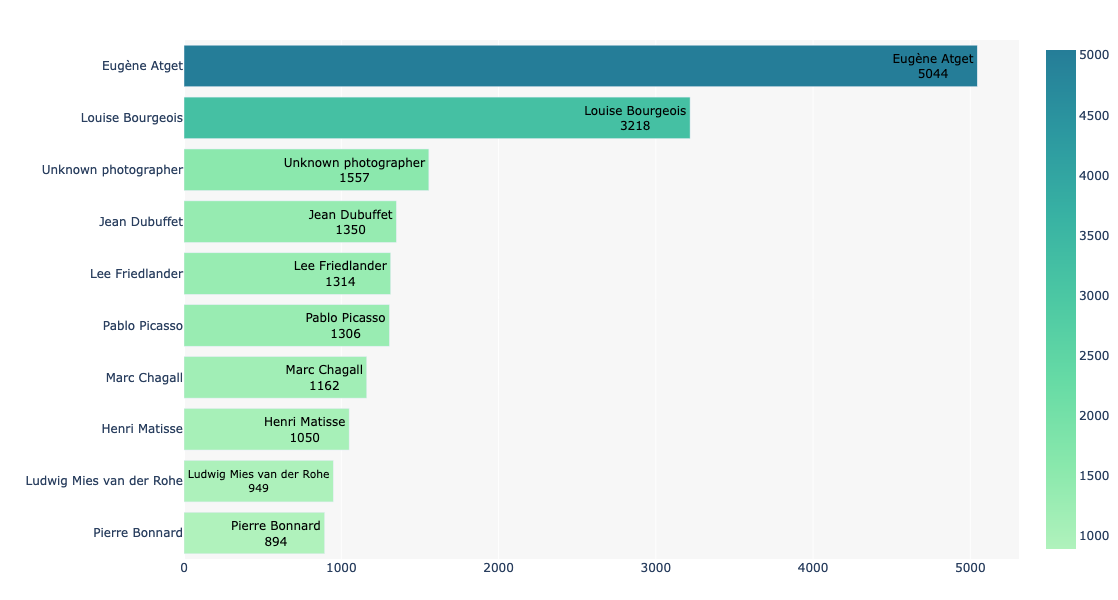

In [22]:
# Visualize artists with the most artwork 
top_artists_df = top_artists.reset_index()

top_artists_df.columns = ['Artist Name', 'Artwork Count']
top_artists_df = top_artists_df[::-1]

fig = px.bar(
    top_artists_df,
    x='Artwork Count',
    y='Artist Name',
    orientation='h', 
    title='',
    labels={'Artist Name': '', 'Artwork Count': ''},
    color='Artwork Count',
    color_continuous_scale='Tealgrn', 
)

top_artists_df['Text'] = top_artists_df['Artist Name'] + '<br>' + top_artists_df['Artwork Count'].astype(str)

fig.update_traces(text=top_artists_df['Text'], textposition='inside', textfont=dict(color='black'))

fig.update_layout(
    xaxis=dict(title='', showticklabels=True, tickangle=0),
    yaxis=dict(title=''),
    plot_bgcolor='rgba(0, 0, 0, 0.03)',  
    margin=dict(l=0, r=0, t=40, b=0),
    height=600
)

fig.show()

In [23]:
unknown_photographers = df[df['Artist Name'] == 'Unknown photographer']
unknown_photographers.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1557 entries, 20783 to 116620
Data columns (total 25 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Artist ID           1557 non-null   int64  
 1   Artist Name         1557 non-null   object 
 2   Nationality         0 non-null      object 
 3   Gender              0 non-null      object 
 4   Birth Year          0 non-null      float64
 5   Death Year          0 non-null      float64
 6   Artwork ID          1557 non-null   int64  
 7   Title               1557 non-null   object 
 8   Year                1502 non-null   float64
 9   Medium              1555 non-null   object 
 10  Dimensions          1549 non-null   object 
 11  Diameter (cm)       0 non-null      float64
 12  Circumference (cm)  0 non-null      float64
 13  Height (cm)         1551 non-null   float64
 14  Length (cm)         0 non-null      float64
 15  Width (cm)          1549 non-null   float64
 16  

In [24]:
unknown_artists = df[df['Artist Name'] == 'Unknown Artist']
unknown_artists.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 676 entries, 3222 to 103558
Data columns (total 25 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Artist ID           676 non-null    int64  
 1   Artist Name         676 non-null    object 
 2   Nationality         676 non-null    object 
 3   Gender              0 non-null      object 
 4   Birth Year          0 non-null      float64
 5   Death Year          0 non-null      float64
 6   Artwork ID          676 non-null    int64  
 7   Title               676 non-null    object 
 8   Year                589 non-null    float64
 9   Medium              550 non-null    object 
 10  Dimensions          388 non-null    object 
 11  Diameter (cm)       0 non-null      float64
 12  Circumference (cm)  0 non-null      float64
 13  Height (cm)         383 non-null    float64
 14  Length (cm)         12 non-null     float64
 15  Width (cm)          385 non-null    float64
 16  De

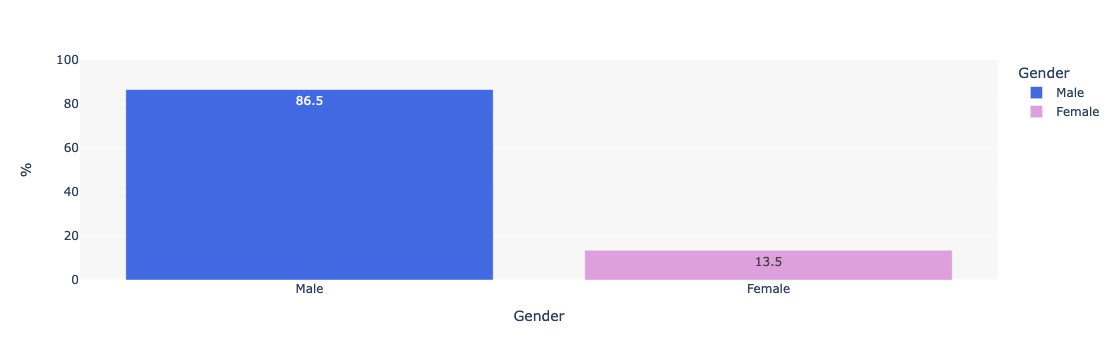

In [25]:
# Visualize the percentage of artworks per gender
gender_counts = df['Gender'].value_counts().reset_index()

gender_counts['Percentage'] = ((gender_counts['Gender'] / gender_counts['Gender'].sum()) * 100).round(1)

fig = px.bar(
    gender_counts,
    x='index',
    y='Percentage',
    range_y=[0,100],
    text='Percentage',
    title='',
    labels={'index': 'Gender', 'Percentage': '%'},
    color='index',
    color_discrete_map={'Male': 'royalblue', 'Female': 'plum'},
)

fig.update_layout({
    'plot_bgcolor': 'rgba(0, 0, 0, 0.03)',
})

fig.show()

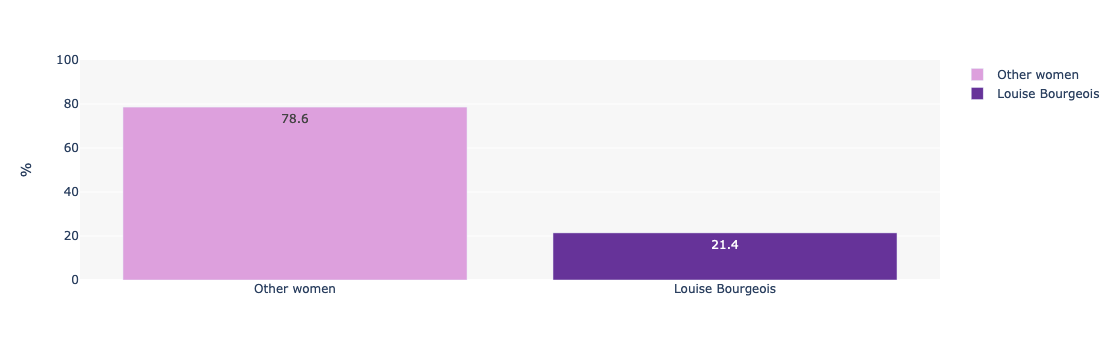

In [26]:
# Visualize the proportion of Louise Bourgeois artworks to other women artworks
female = df[df['Gender'] == 'Female']

louise = female[female['Artist Name'] == 'Louise Bourgeois']

non_louise = female[female['Artist Name'] != 'Louise Bourgeois']

tmp = pd.DataFrame(data={'category': ['Other women', 'Louise Bourgeois'], 'percentage': [100 - len(louise)/len(female) * 100, 
                                                                                        100 - len(non_louise)/len(female) * 100]})
tmp['percentage'] = tmp['percentage'].round(1)

fig = px.bar(
    tmp,
    x='category',
    y='percentage',
    range_y=[0,100],
    text='percentage',
    title='',
    labels={'percentage': '%', 'category': ''},
    color='category',
    color_discrete_map={'Other women': 'plum', 'Louise Bourgeois': 'rebeccapurple'},
)

fig.update_layout({
    'plot_bgcolor': 'rgba(0, 0, 0, 0.03)',
})


fig.show()

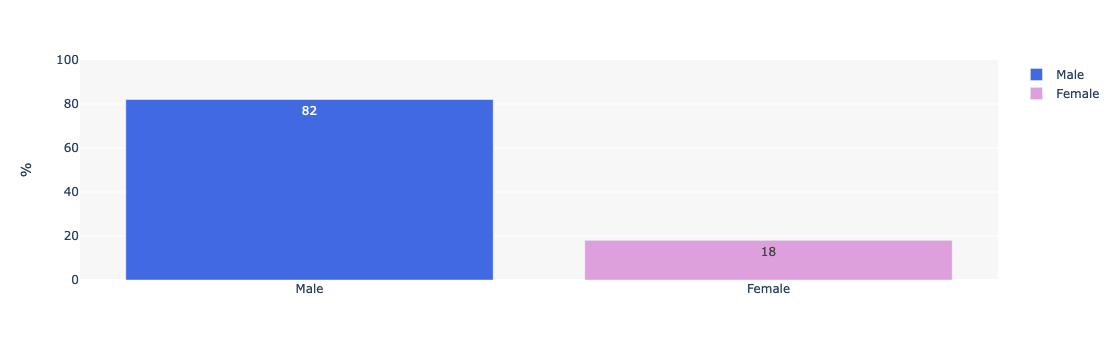

In [27]:
# Visualize the proportion of unique male artists to unique female artists
male = df[df['Gender'] == 'Male']

unique_fem = female['Artist ID'].unique()

unique_male = male['Artist ID'].unique()

total_artists = len(unique_fem) + len(unique_male)

gender_cat = pd.DataFrame(data={'category': ['Male', 'Female'], 'percentage': [len(unique_male)/ total_artists * 100, len(unique_fem)/total_artists * 100]})

gender_cat['percentage'] = gender_cat['percentage'].round(1)

fig = px.bar(
    gender_cat,
    x='category',
    y='percentage',
    range_y=[0,100],
    text='percentage',
    title='',
    labels={'percentage': '%', 'category': ''},
    color='category',
    color_discrete_map={'Male': 'royalblue', 'Female': 'plum'},
)


fig.update_layout({
    'plot_bgcolor': 'rgba(0, 0, 0, 0.03)',
})


fig.show()